# Fish Weight Estimation & Species Prediction


1. MULTIPLE LINEAR REGRESSION MODEL FOR WEIGHT ESTIMATION FROM MEASUREMENTS OF THE FISH

The primary focus of this study is to predict the weight of the fish individually from their measurements using multiple linear regression model.

2. MULTIPLE LINEAR REGRESSION MODEL FOR SPECIES PREDICTION

The secondary focus of this study on estimating the weight of the fish individually from their measurements using multiple linear regression model.

#### KEY DEFINITIONS
###### OVERFITTING 

Adding more independent variables to a multiple regression procedure does not mean the regression will be "better" or offer better predictions, in fact it can make things worst which is called OVERFITTING.

###### MULTICOLLINEARITY

The addition of more independent variables creates more relationships among them. So not only are the independent variables potentially related to the dependent variable, they are also potentially related to each other. When this happens, it is called MULTICOLLINEARITY.

NOTE : The overall idea if for all independent variables to be correlated with the dependent variable but NOT with each other.

#### KEY FORMULAS

##### MULTIPLE REGRESSION MODEL

y = β0 + β1x1 + β2x2 + .... βpxp + E

β0 + β1x1 + β2x2 + .... βpxp = Sum Of Linear Parameters

E = Error

β0 = Intercept (constant term) 

β1x1 = 1 variable and its weight

β2x2 = second variable and its weight

##### MULTIPLE REGRESSION EQUATION

E(y) = β0 + β1x1 + β2x2 + .... βpxp

E(y) = Expected value of y

Note: The Error term is assumed to be zero


##### ESTIMATED MULTIPLE REGRESSION EQUATION

ŷ = b0 + b1x1 + b2x2 + .... bpxp

Note : b0, b1, b2, .... bp are the estimates of β0, β1, β2....βp

Note : ŷ - Predicted value of the dependent variable

##### EXAMPLE

ŷ = 6.211 + 0.014x1 + 0.383x2 - 0.607x3

ŷ = b0 + b1x1 + b2x2 + b3x3

NOTE: From the above example x1, x2 & x3 are variables 
      6.211 is the intercept (b0)
      0.014, 0.383, - 0.607 - 1st, 2nd & 3rd coefficients
      
##### INTERPRETING COEFFICIENTS WITH EXAMPLE

ŷ = 27 + 9x1 + 12x2

x1 = Capital Investment ($1000 Sales)

x2 = Marketing Expenditures ($1000 Sales)

ŷ = Predicted sales ($1000 Sales)



NOTE:in multiple regression, each coefficient is interpreted as the estimated change in y corresponding to a one unit change in a variable, when all other variable are help constant.


So from the above example USD 9000 is an estimate of the expected increase in sales y,  corresponding to a USD 1000 increase in capital investment(x1) when marketing expenditures (x2) are held constant.



#### LOADING PACKAGES


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('Fish.csv')

In [3]:
df.shape

(159, 7)

#### 1.1 UNDERSTANDING THE DATASET

In [4]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [8]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [9]:
Fish = df['Species'].value_counts()
Fish = pd.DataFrame(Fish)
Fish

,Species
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


####  There are total 159 rows(training samples) and 7 columns in dataset.

* Species:Differnt kinds of fishes ( 7 different species)
* Weight: Weight of fish in gram
* Length1: Vertical length in cm
* Length2: Diagonal length in cm
* Length3: Cross length in cm
* Height: Height in cm
* Width: Diagonal width in cm


Our dependent variable is 'Weight'. Independent variables are 'species', different lengths, 'height' and 'width'.

I will use independent variables (measurements of the fish) to estimate dependent variable (weight of the fish).

#### Renaming Column Names:

In [10]:
df.rename(columns= {'Length1':'VerticalLen', 'Length2':'DiagonalLen', 'Length3':'CrossLen'}, inplace=True)
df.head()

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


#### 1.2 Global overview 



In [11]:
df.profile_report()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

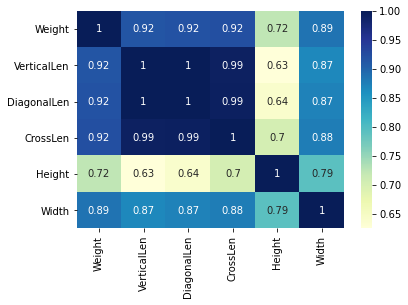

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

<AxesSubplot:xlabel='Species', ylabel='count'>

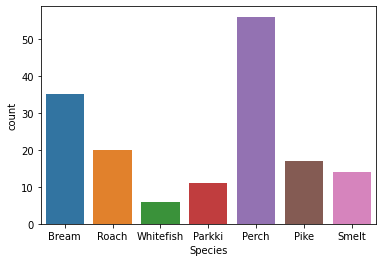

In [13]:
sns.countplot(x=df['Species'])

<AxesSubplot:xlabel='Species', ylabel='Width'>

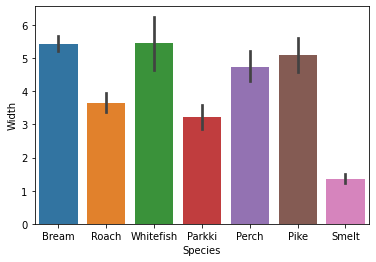

In [14]:
sns.barplot(y=df['Width'],x=df['Species']) #whitefish has maximum width along side bream

<AxesSubplot:xlabel='Species', ylabel='Weight'>

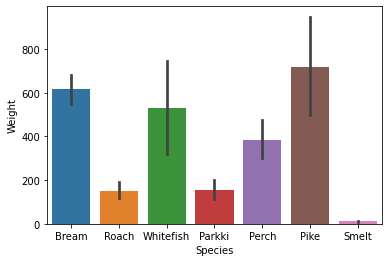

In [15]:
sns.barplot(y=df['Weight'],x=df['Species']) #Pike has maximum weight

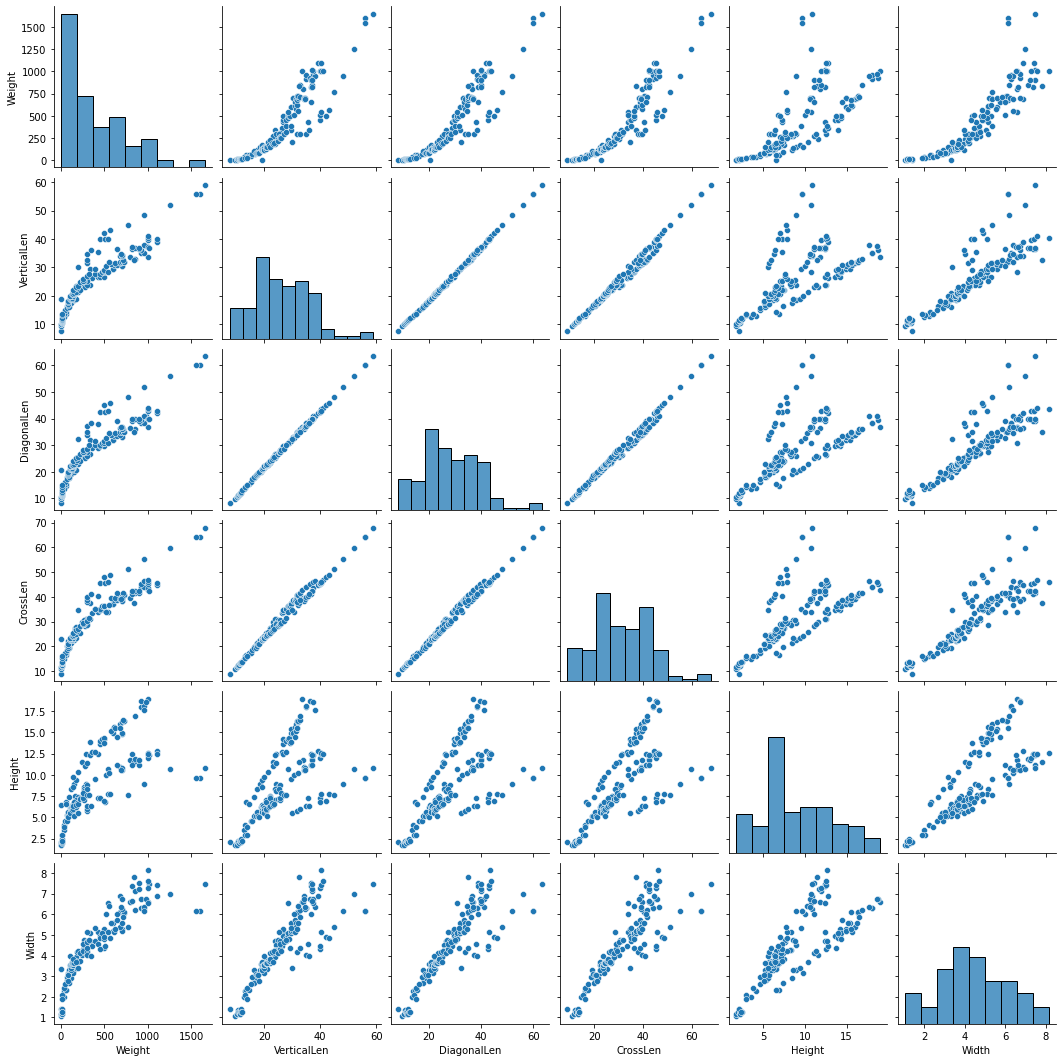

In [16]:
sns.pairplot(df) 

<AxesSubplot:ylabel='Weight'>

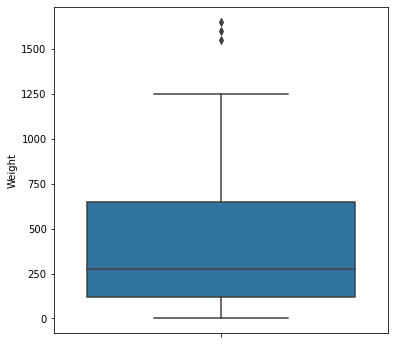

In [17]:
# Checking for outliers

plt.figure(figsize=(6,6))
sns.boxplot(y=df['Weight']) 

In [18]:
# Z-score analysis
z = np.abs(stats.zscore(df.drop('Species',axis=1)))
threshold=3
print(np.where(z>3))
print('\n')
print(np.where(z<-3)) ## caught some outliers, here i have their indexes  

(array([142, 143, 144, 144, 144, 144]), array([0, 0, 0, 1, 2, 3]))


(array([], dtype=int64), array([], dtype=int64))


In [19]:
#IQR analysis
df_= df.drop('Species',axis=1)
Q1 =df_.quantile(0.25)
Q3 = df_.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Weight         530.00000
VerticalLen     13.65000
DiagonalLen     14.50000
CrossLen        16.50000
Height           6.42110
Width            2.19885
dtype: float64


In [20]:
df_ = df_[(z < 3).all(axis=1)]

In [21]:
df_out = df_[~((df_ < (Q1 - 1.5 * IQR)) |(df_ > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(156, 6)

<AxesSubplot:ylabel='Weight'>

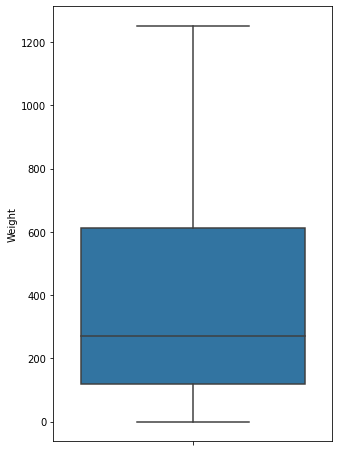

In [22]:
plt.figure(figsize=(5,8))
sns.boxplot(y=df_out['Weight']) ## fair enough 

## Getting the X and y for the training of the logistic regression in x exculding the species coloumn from df and y includes the species.

In [23]:
X= df.drop('Species',axis=1)
y = (df['Species'])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()

In [25]:
model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred = model.predict(X_test)

In [27]:
model.score(X_test,y_test)

0.875

In [28]:
df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_new

,Actual,Predicted
78,Perch,Perch
155,Smelt,Smelt
128,Pike,Pike
55,Whitefish,Perch
94,Perch,Perch
29,Bream,Bream
147,Smelt,Smelt
51,Roach,Perch
98,Perch,Perch
141,Pike,Pike
